In [1]:
%pylab inline
from matplotlib import colors as colors

Populating the interactive namespace from numpy and matplotlib


## 1. Define a Grid where the cells with obstacles are occupied

In [2]:
n, m = 20, 20  # number of rows and columns respectively.

In [3]:
# Create a matrix to represent the cells of the grid
grid_cells = np.zeros((20,20))

# Random obstacles for this example. 
np.random.seed(0)  # You can remove the random seed if you want to test different random grids.
grid = np.random.rand(20, 20)
threshold = 2
grid[grid > threshold] = 1
grid[grid<= threshold] = 0

#Cylinder12
grid[3,17] = 1
#Cylinder7
grid[7,13] = 1
#Cylinder11
grid[9,4] = 1
#Cylinder6
grid[11,14] = 1
#Cylinder5
grid[14,12] = 1
#Cylinder8
grid[16,9] = 1
#Cylinder10
grid[12,8] = 1
#Cylinder9
grid[13,5] = 1

#Cuboid1
grid[15,15] = 1
grid[15,16] = 1
grid[15,17] = 1
grid[15,18] = 1
grid[15,19] = 1
#Cuboid0
grid[12,11] = 1
grid[11,12] = 1
grid[10,13] = 1
#Cuboid3
grid[8,7] = 1
grid[8,8] = 1
grid[8,9] = 1
grid[8,10] = 1
#Cuboid4
grid[16,2] = 1
grid[16,3] = 1
grid[16,4] = 1
grid[16,5] = 1
grid[16,6] = 1
#Cuboid6
grid[5,3] = 1
grid[4,4] = 1
grid[4,5] = 1
grid[4,6] = 1
grid[3,7] = 1

print(grid[17, 3])

grid

0.0


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.

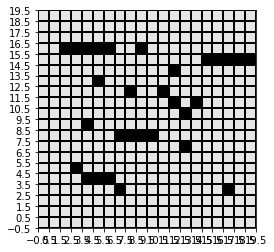

In [4]:
# Plot the grid
def draw_grid():
    fig, ax = plt.subplots()
    cmap = colors.ListedColormap(['0.9', 'black']) # Colors (0.9 is the almost white in gray scale)
    ax.imshow(grid, cmap=cmap, origin='lower')
    ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
    ax.set_xticks(np.arange(-0.5, m, 1));
    ax.set_yticks(np.arange(-0.5, n, 1));

draw_grid()

## 2. Create a graph to represent the grid

In [21]:
import networkx as nx
# This function automatically creates the graph in a grid.
G = nx.grid_2d_graph(n, m) 
print("Number of nodes in a full grid (n*m): ",len(G.nodes()))
# Delete nodes with obstacles
for i in range(n):
    for j in range(m):
        # if the node is an obstacle
        if grid[i][j] == 1:  
            G.remove_node((i,j))

print("Number of nodes after removing obstacles: ",len(G.nodes()))
print("Nodes:", G.nodes())

Number of nodes in a full grid (n*m):  400
Number of nodes after removing obstacles:  370
Nodes: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15), (2, 16), (2, 17), (2, 18), (2, 19), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (3, 16), (3, 18), (3, 19), (4, 0), (4, 1), (4, 2), (4, 3), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (4, 16), (4, 17), (4, 18), (4, 19), (5, 0), (5, 1), (5, 2), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5,

## Plot the graph



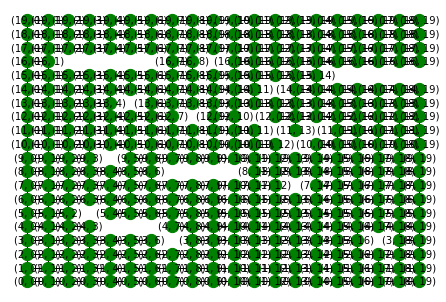

In [6]:
# Position of the nodes
pos = {node:(node[1], node[0]) for node in G.nodes()}  # by making (x,y) = (j, i), where i and j iterate over the columns and the rows respectively.
nx.draw(G, pos, font_size=10, with_labels=True, node_size=150, node_color="g")

### Overlapping the grid and graph

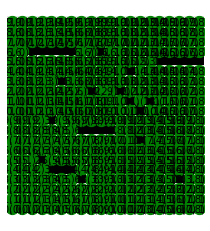

In [7]:
# Plot grid
draw_grid()

# Plot the graph
pos = {node:(node[1], node[0]) for node in G.nodes()}  # by making (x,y) = j, -i, where i and j iterate over the columns and the rows respectively.
nx.draw(G, pos, font_size=10, with_labels=True, node_size=150, node_color="g")


# 3. Find a path between a pair of nodes

In [22]:
start_node =  (18, 19)
end_node = (3,2)

#define euclidean distance heuristic
def dist(a, b):
    (x1, y1) = a
    (x2, y2) = b
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5

# Run astar_path to generate a path
astar_path = nx.astar_path(G, source=start_node, heuristic=dist, target=end_node)


## Plot the result

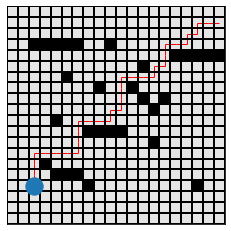

In [20]:
# Edges of the path
E = [(astar_path[i], astar_path[i+1])for i in range(len(astar_path)-1)]

draw_grid()
nx.draw_networkx_nodes(path, pos)
nx.draw_networkx_edges(G, nodes=path, edgelist=E, pos=pos,edge_color='r')
